In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Thickness of samples (cm)
d = 0.11 

# Absorption cross section of OH in glass @ 2.73um/3600cm-1 (cm2) - 2.73um actually = 3663 cm-1
sig_OH = 1.2E-19

# UV-VIS

<IPython.core.display.Javascript object>


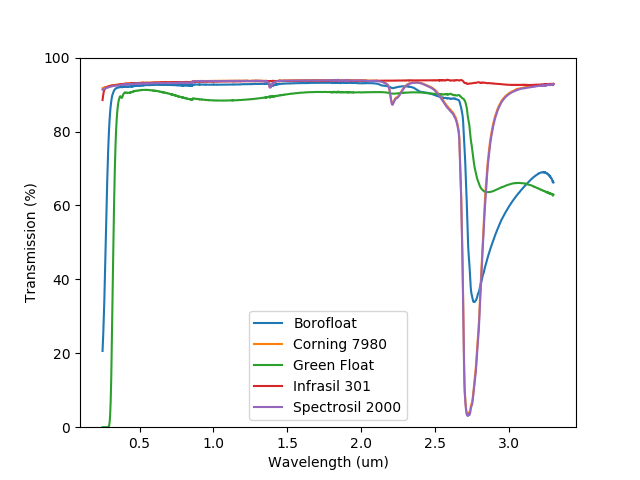

(0, 100)

In [3]:
path = './Substrates - UVVIS/data/'
files = [x for x in os.listdir(path) if '.csv'in x and 'Correction' not in x]

fig, ax1 = plt.subplots()
store = {}
for f in files:
    result = np.genfromtxt(path + f, delimiter=',', skip_header=1)
    f = f.split('.')[0]
    # Wavelength (um)
    x = result[:, 0] / 1000
    # Transmission
    y = result[:, 1] / 100
    
    ax1.plot(x, 100*y, label=f)
    
    # Store number of OH
    y = y[np.where(x == 2.73)[0][0]]
    alpha = np.log(y)/-d
    store[f] = alpha / sig_OH

ax1.legend()
ax1.set_xlabel('Wavelength (um)')
ax1.set_ylabel('Transmission (%)')
ax1.set_ylim(0, 100)

<IPython.core.display.Javascript object>


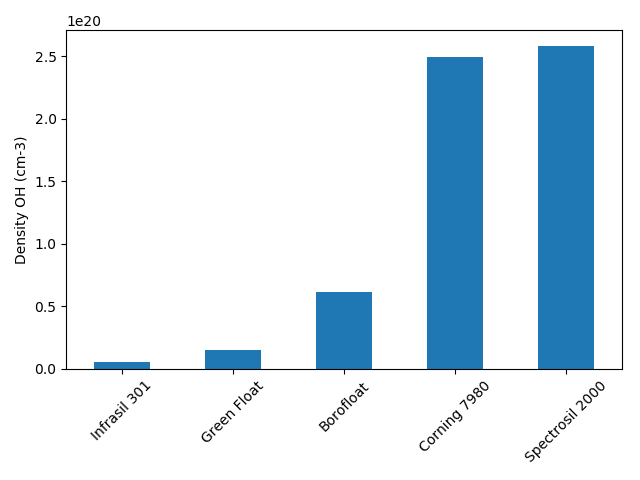

In [4]:
store = pd.Series(store, name='Sample')
store = store.sort_values()

fig, ax = plt.subplots()
store.plot(kind='bar', rot=45)
ax.set_ylabel('Density OH (cm-3)')
plt.tight_layout()

# FTIR

<IPython.core.display.Javascript object>


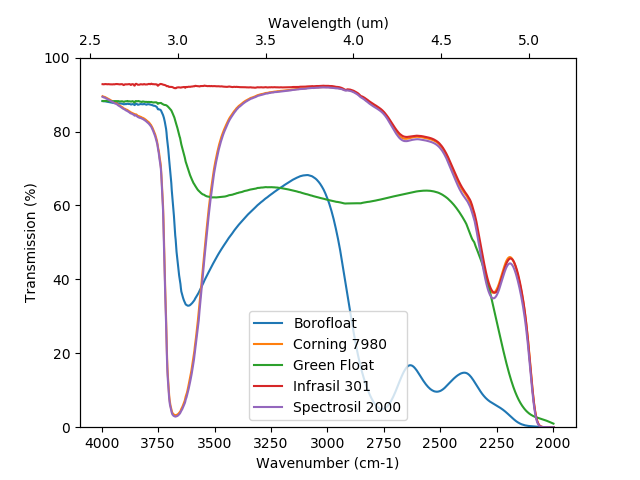

In [5]:
path = './Substrates - FTIR/'
files = [x for x in os.listdir(path) if '.DPT'in x]

fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

store = {}
for f in files:
    result = np.genfromtxt(path + f)
    f = f.split('.')[0]
    # Wavenumber
    x = result[:, 0]
    # Transmission
    y = result[:, 1]
    ax1.plot(x, 100*y, label=f)
    
    # Store number of OH
    y = y[np.where(x >= 3663)[0][0]]
    alpha = -np.log(y)/d
    store[f] = alpha / sig_OH

# In wavenumber so x is descending
ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_xlabel('Wavenumber (cm-1)')
ax1.set_ylabel('Transmission (%)')
ax1.legend()
ax2.set_ylim(0, 100)
lb, ub = ax1.get_xlim()
ax2.set_xlim(10000/lb, 10000/ub)
ax2.set_xlabel('Wavelength (um)')

<IPython.core.display.Javascript object>


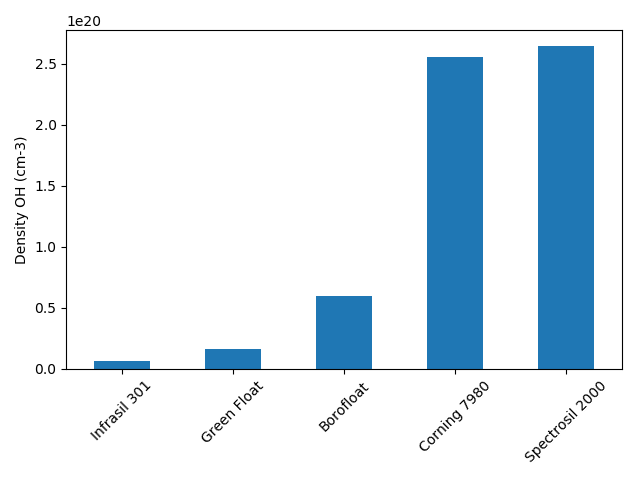

In [35]:
store = pd.Series(store, name='Sample')
store = store.sort_values()

fig, ax = plt.subplots()
store.plot(kind='bar', rot=45)
ax.set_ylabel('Density OH (cm-3)')
plt.tight_layout()

# Plot UV-VIS and FTIR data together

<IPython.core.display.Javascript object>


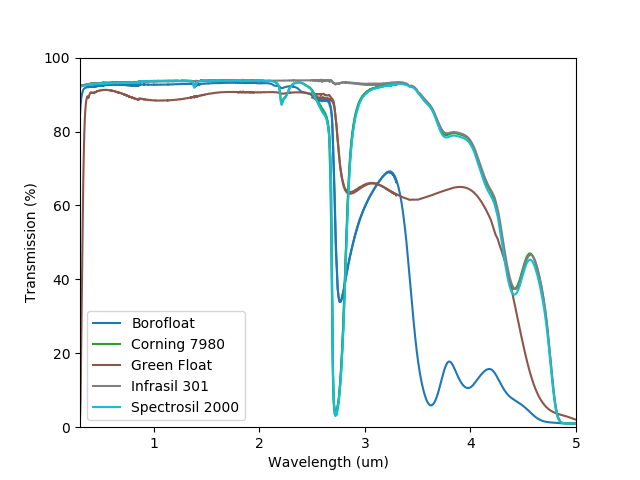

(0.3, 5)

In [30]:
fig, ax1 = plt.subplots()

path = './Substrates - UVVIS/data/'
files = [x for x in os.listdir(path) if '.csv'in x and 'Correction' not in x]

# Color map - unique for each sample
samples = [f.split('.')[0] for f in files]
colors = np.arange(len(samples))
color_dict = dict(zip(samples, colors))
import matplotlib.colors as mcolors
import matplotlib.cm as cmx
cNorm  = mcolors.Normalize(vmin=0, vmax=len(samples)-1)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('tab10') )

for f in files:
    result = np.genfromtxt(path + f, delimiter=',', skip_header=1)
    f = f.split('.')[0]
    # Wavelength (um)
    x = result[:, 0] / 1000
    # Transmission
    y = result[:, 1] / 100
    
    colorVal = scalarMap.to_rgba(color_dict[f])
    ax1.plot(x, 100*y, color=colorVal)

path = './Substrates - FTIR/'
files = [x for x in os.listdir(path) if '.DPT'in x]
for f in files:
    result = np.genfromtxt(path + f)
    f = f.split('.')[0]
    # Wavenumber
    x = 10E3/result[:, 0]
    # Transmission - NOTE 1% OFFSET BETWEEN UVVIS AND FTIR. NOT SURE WHICH IS RIGHT.
    y = 0.01 + result[:, 1]
    
    colorVal = scalarMap.to_rgba(color_dict[f])
    ax1.plot(x, 100*y, label=f, color=colorVal)
    
ax1.legend()
ax1.set_xlabel('Wavelength (um)')
ax1.set_ylabel('Transmission (%)')
ax1.set_ylim(0, 100)
ax1.set_xlim(0.3, 5)